In [55]:
import os
import pandas as pd
import psycopg2
import matplotlib as plt

def make_csv(query, filename):

    # check if file already exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        return df
    # ensure all columns are displayed when viewing a pandas dataframe
    pd.set_option('display.max_columns', None)

    # Creating a connection to the database
    print("creating conecction...")
    con = psycopg2.connect(database="mid_term_project", 
                           user="lhl_student", 
                           password="lhl_student", 
                           host="lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com", 
                           port="5432")


    # creating a cursor object
    cur = con.cursor()
    # running an sql query
    print("running query...")
    cur.execute(query)
    # Storing the result
    rows = cur.fetchall()
    cols = [desc[0] for desc in cur.description]

    con.close()

    # writing the csv file
    print("writing file...")
    df = pd.DataFrame(rows, columns=cols)
    df.to_csv(filename, index=False)

    print('Done')

    return df

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

See graph, summer break results in a larger volume of flights, meaning higher chance for delays, same goes for Christmas time.

In [62]:
make_csv("SELECT * FROM passengers ORDER BY RANDOM() LIMIT 400000", "passenger.csv")

creating conecction...
running query...
writing file...
Done


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,13.0,16900.0,78.0,3.0,0.0,562.0,28.0,240.0,188.0,V8,20346,Iliamna Air Taxi,D,V8,Iliamna Air Taxi,1,5,14046,34046,PDB,"Pedro Bay, AK",US,United States,12321,32321,ILI,"Iliamna, AK",US,United States,0,35,1,2015,10,1,F,DU
1,0.0,1.0,28607.0,60.0,48.0,0.0,0.0,677.0,86.0,76.0,AMQ,20201,Ameristar Air Cargo,D,AMQ,Ameristar Air Cargo,1,4,11049,31049,CLL,"College Station/Bryan, TX",US,United States,10693,30693,BNA,"Nashville, TN",US,United States,6,620,1,2016,2,2,L,DU
2,17.0,17.0,3627630.0,0.0,0.0,1228229.0,0.0,812.0,2376.0,1992.0,ABX,20453,ABX Air Inc,D,ABX,ABX Air Inc,2,2,11193,33105,CVG,"Cincinnati, OH",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,625,2,2015,10,2,G,DU
3,1.0,1.0,20210.0,79.0,64.0,0.0,0.0,1031.0,201.0,183.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,14689,34689,SBA,"Santa Barbara, CA",US,United States,10279,30279,AMA,"Amarillo, TX",US,United States,6,638,1,2016,8,3,F,DU
4,54.0,54.0,1177362.0,4104.0,3082.0,0.0,0.0,931.0,8287.0,6700.0,YX,20452,Republic Airline,D,YX,Republic Airline,2,2,13487,31650,MSP,"Minneapolis, MN",US,United States,11278,30852,DCA,"Washington, DC",US,United States,6,673,1,2017,4,2,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,85.0,85.0,2793950.0,12663.0,11862.0,11664.0,0.0,366.0,6307.0,4680.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,10397,30397,ATL,"Atlanta, GA",US,United States,11252,31252,DAB,"Daytona Beach, FL",US,United States,6,655,1,2016,5,1,F,DU
399996,10.0,9.0,352113.0,1437.0,1112.0,1284.0,1369.0,432.0,782.0,585.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,10397,30397,ATL,"Atlanta, GA",US,United States,12339,32337,IND,"Indianapolis, IN",US,United States,6,694,1,2017,6,1,F,DU
399997,0.0,5.0,163031.0,650.0,595.0,0.0,0.0,2024.0,0.0,0.0,WS,20229,Westjet,I,WS,Westjet,0,0,13204,31454,MCO,"Orlando, FL",US,United States,16268,36268,YYT,"St. John's, Canada",CA,Canada,6,612,1,2015,11,5,F,IF
399998,10.0,10.0,360000.0,1800.0,1674.0,0.0,0.0,890.0,1308.0,1164.0,G4,20368,Allegiant Air,D,G4,Allegiant Air,3,3,14082,34082,PGD,"Punta Gorda, FL",US,United States,12917,31066,LCK,"Columbus, OH",US,United States,6,694,1,2018,8,2,F,DU


In [56]:
make_csv("SELECT * FROM flights ORDER BY RANDOM() LIMIT 400000", "flight.csv")
df1 = pd.read_csv("flight.csv")

In [63]:
make_csv("SELECT * FROM fuel_comsumption ORDER BY RANDOM() LIMIT 400000", "fuel_comsumption.csv")

creating conecction...
running query...
writing file...
Done


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,12,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,254634.0,0.0,0.0,0.0,0.0,254634.0,363025.0,0.0,363025.0,589423.0,0.0,0.0,0.0,0.0,589423.0,840325.0,0.0,840325.0,2016
1,11,20177.0,PFQ,PFQ,Asia Pacific,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333279.0,333279.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,638003.0,638003.0,2016
2,4,20453.0,ABX,ABX,ABX Air Inc,2,161669.0,0.0,0.0,0.0,0.0,161669.0,161669.0,0.0,161669.0,320880.0,0.0,0.0,0.0,0.0,320880.0,320880.0,0.0,320880.0,2016
3,8,21650.0,EE,EE,Eastern Airlines Group Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,107520.0,446480.0,554000.0,0.0,0.0,0.0,0.0,0.0,0.0,181709.0,754551.0,936260.0,2016
4,9,20436.0,F9,F9,Frontier Airlines Inc.,3,18739285.0,0.0,0.0,457011.0,457011.0,19196296.0,18739285.0,457011.0,19196296.0,25443200.0,0.0,0.0,676721.0,676721.0,26119921.0,25443200.0,676721.0,26119921.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,4,19930.0,AS,AS,Alaska Airlines Inc.,3,34664669.0,0.0,0.0,1139400.0,1139400.0,35804069.0,34743425.0,1139400.0,35882825.0,68176111.0,0.0,0.0,2180580.0,2180580.0,70356691.0,68313621.0,2180580.0,70494201.0,2015
3031,11,20368.0,G4,G4,Allegiant Air,3,14198071.0,0.0,0.0,0.0,0.0,14198071.0,14879759.0,99129.0,14978888.0,33851096.0,0.0,0.0,0.0,0.0,33851096.0,35624483.0,271778.0,35896261.0,2018
3032,3,19790.0,DL,DL,Delta Air Lines Inc.,3,149445127.0,56808818.0,42639870.0,31588684.0,131037372.0,280482499.0,150807913.0,131902531.0,282710444.0,394715231.0,150043741.0,112620643.0,83432192.0,346096576.0,740811807.0,398876443.0,348381638.0,747258081.0,2015
3033,5,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,0.0,0.0,38284.0,21030.0,59314.0,0.0,0.0,0.0,0.0,0.0,0.0,99177.0,54479.0,153656.0,2016


In [57]:
columns = ['fl_date','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','dep_delay']
df2= df1[columns].dropna()
df2.head()

,fl_date,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_delay
6,2018-05-11,0.0,0.0,0.0,0.0,46.0,58.0
7,2018-07-23,8.0,0.0,0.0,0.0,7.0,23.0
9,2019-10-24,4.0,0.0,0.0,0.0,69.0,95.0
17,2019-02-24,0.0,0.0,0.0,0.0,18.0,31.0
25,2019-07-17,16.0,0.0,6.0,0.0,0.0,16.0


In [58]:
date = df2['fl_date'].str.split(pat = '-', expand=True)
df2[['Year','Month','Day']] = date
new_col = ['Year','Month','Day','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','dep_delay']
df3 = df2[new_col]
df3

,Year,Month,Day,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_delay
6,2018,05,11,0.0,0.0,0.0,0.0,46.0,58.0
7,2018,07,23,8.0,0.0,0.0,0.0,7.0,23.0
9,2019,10,24,4.0,0.0,0.0,0.0,69.0,95.0
17,2019,02,24,0.0,0.0,0.0,0.0,18.0,31.0
25,2019,07,17,16.0,0.0,6.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...
399981,2019,05,05,16.0,0.0,60.0,0.0,0.0,16.0
399986,2018,12,25,179.0,0.0,14.0,0.0,0.0,179.0
399990,2019,02,24,30.0,0.0,7.0,0.0,0.0,30.0
399992,2018,04,20,0.0,0.0,15.0,12.0,0.0,12.0


<AxesSubplot:>

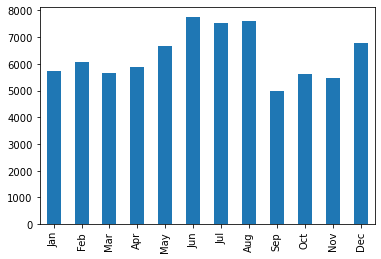

In [59]:
bar_chart = df3['Month'].value_counts().sort_index()
bc = bar_chart.rename(index={'01': "Jan", '02': "Feb", '03': "Mar",'04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
bc.plot(kind="bar")


In [60]:
bc.describe()

count      12.000000
mean     6308.583333
std       931.789818
min      4978.000000
25%      5643.750000
50%      5966.000000
75%      6957.750000
max      7751.000000
Name: Month, dtype: float64